# PfDA Project 2: An Analysis of Paleo-Present Climate Data

***

<div align="justify">

## FIRST PART: CO2 vs Temperature Anomaly from 800kyrs – present.

***
</div>

<div align="justify">

In this analysis of paleo-present climate data, we embark on a journey through the Earth's deep history, spanning the last 800,000 years to the present day. Our primary focus is to investigate the intricate relationship between two critical climate variables: atmospheric carbon dioxide (CO2) concentrations and temperature anomalies.

This exploration of paleo-climate data will shed light on the dynamic interplay between these two key factors and provide insights into the Earth's climatic evolution over a vast timescale. By examining CO2 levels and temperature anomalies, we aim to uncover patterns, trends, and potential correlations that offer valuable perspectives on the Earth's response to changing CO2 concentrations.</div>

<div align="justify">

### 1. CO2 CONCENTRATION

### An overview of the *Luthi et al. 2008 Nature Paper* dataset: DC3_gas_a (yr): Investigating the concentration of greenhouse gases in the Earth’s atmosphere over the last 800,000 years.

The dataset from the **Lüthi et al. 2008 Nature paper**, often referred to as the EPICA Dome C Ice Core dataset, is a paleoclimatic dataset derived from ice core samples taken from Dome Concordia (Dome C) in Antarctica. The paper, titled *"High-resolution carbon dioxide concentration record 650,000–800,000 years before present,"* provides valuable information about past climate conditions, particularly atmospheric CO2 levels, over an extended period of time.  

In fact, the dataset covers a time range of approximately 650,000 to 800,000 years before the present (BP) and it provides insights into Earth's climate history during this period. The primary focus of the dataset is to provide high-resolution measurements of atmospheric carbon dioxide (CO2) concentrations over the specified time range. These measurements are based on the examination of ice cores that are cylinders of ice drilled out of an ice sheet or glacier and that are essential for understanding past changes in greenhouse gas levels.  The dataset includes depth profiles, which indicate the depth within the ice core at which each measurement was taken. This allows researchers to establish a chronological order for the measurements and study changes over time. The measuraments were collected by multiple research groups, including Lüthi et al., the University of Bern, and LGGE in Grenoble, as indicated in the column headers and in different Antartica locations:  Dome C, Vostok site and Taylor Dome.  

The variable considered are **Depth**, the **EDC3 age scale**, which relates the age of the trapped air to the depth in the ice core from which the air was extracted, the  **Carbon Dioxide** and **Sigma** error, namely the uncertainty or error associated with the measurements, considered in units of *"ppmv"*: parts per million by volume.

One of the significant contributions of **The Lüthi et al. 2008 paper** is its high-resolution measurements of CO2 concentrations, which provide insights into shorter-term climate variations within the broader timespan. My main source for the present information is [the ANSTO document](https://www.ansto.gov.au/sites/default/files/2019-06/information%20processing%20updated%20to%20new%20format%20%282%29.pdf) released by the Australian Governament.</div>

<div align="center">

![Antartica Sites](img/Map-of-the-Antarctic-region-including-the-Talos-Dome-TD-Vostok-Taylor-Dome-Taylor.png.jpeg)

</div>

<div align="justify">

To begin my analysis of paleo-present climate data, I am starting by examining the "New CO2 Data" section from the **Luthi et al. 2008 Nature Paper**. My aim is to look for patterns or trends in the CO2 levels over the specified time range (800kyrs – present) and, in this manner, I am presenting an initial overview of the data set and its content in search of correlations or variations that may emerge.</div>

In [1]:
# Importing necessary libraries: Pandas for data manipulation, Matplotlib and Seaborn for plotting data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Reading CO2 data from Luthi et al. 2008 Nature Paper dataset and using 'header' parameter to specify the row that contains column names (0-based index)
# The 'skiprows' parameter is used to skip the rows above the data
df = pd.read_excel('/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/41586_2008_BFnature06949_MOESM31_ESM-3.xls', header=5, skiprows=[6])


df.columns = ["Depth (m)", "EDC3_gas_a (yr) (University of Bern)", "CO2 (ppmv) (University of Bern)", "sigma (ppmv) (University of Bern)",
              "Depth (m) (LGGE University of Grenoble)", "EDC3_gas_a (yr) (LGGE University of Grenoble)", "CO2 (ppmv) (LGGE University of Grenoble)"]

# Display the data
print(df)

     Depth (m)  EDC3_gas_a (yr) (University of Bern)  \
0      3026.58                                611269   
1      3030.97                                616164   
2      3036.44                                623109   
3      3040.87                                630183   
4      3043.07                                635364   
..         ...                                   ...   
242    3187.87                                794608   
243    3188.23                                795202   
244    3188.98                                796467   
245    3189.33                                797099   
246    3190.08                                798512   

     CO2 (ppmv) (University of Bern)  sigma (ppmv) (University of Bern)  \
0                              257.8                                2.1   
1                              252.6                                0.6   
2                              243.3                                2.8   
3                          

<div align="justify">

### First section: New CO2 data analysis

The dataset has been downloaded in *Excel* format and its first section contains data collected from two different universities: the University of Bern and LGGE (University of Grenoble). The information belong the same area of exploration, **Dome C**, but refer to distinct time periods.

+ **University of Bern Data**:
Time Period: The University of Bern's data spans from 611,269 to 798,512 years ago.
Location: This data pertains to the Dome C research site.
- **LGGE (University of Grenoble) Data**:
Time Period: LGGE University of Grenoble's data covers a different time range, from 667,435 to 798,893 years ago.
Location: Similar to the University of Bern, this data also originates from the Dome C site.</div>

In [2]:
# Preprocessing data: missing values are not critical for my analysis.
print(df.isnull().sum())

Depth (m)                                          0
EDC3_gas_a (yr) (University of Bern)               0
CO2 (ppmv) (University of Bern)                    0
sigma (ppmv) (University of Bern)                  0
Depth (m) (LGGE University of Grenoble)          200
EDC3_gas_a (yr) (LGGE University of Grenoble)    200
CO2 (ppmv) (LGGE University of Grenoble)         200
dtype: int64


In [6]:
# to get information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Depth (m)                                      47 non-null     float64
 1   EDC3_gas_a (yr) (University of Bern)           47 non-null     int64  
 2   CO2 (ppmv) (University of Bern)                47 non-null     float64
 3   sigma (ppmv) (University of Bern)              47 non-null     float64
 4   Depth (m) (LGGE University of Grenoble)        47 non-null     float64
 5   EDC3_gas_a (yr) (LGGE University of Grenoble)  47 non-null     float64
 6   CO2 (ppmv) (LGGE University of Grenoble)       47 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.9 KB


In [5]:
# First five rows of the dataset dispayed
print(df.head())

   Depth (m)  EDC3_gas_a (yr) (University of Bern)  \
0    3026.58                                611269   
1    3030.97                                616164   
2    3036.44                                623109   
3    3040.87                                630183   
4    3043.07                                635364   

   CO2 (ppmv) (University of Bern)  sigma (ppmv) (University of Bern)  \
0                            257.8                                2.1   
1                            252.6                                0.6   
2                            243.3                                2.8   
3                            204.4                                0.9   
4                            195.0                                1.5   

   Depth (m) (LGGE University of Grenoble)  \
0                                  3061.71   
1                                  3063.98   
2                                  3085.78   
3                                  3086.88   
4     

In [18]:
# Display statistics about data
df.describe()

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m)_LGGE,EDC3_gas_a (yr)_LGGE,CO2 (ppmv)_LGGE
count,247.000000,247.000000,247.000000,247.000000,47.000000,47.000000,47.00000
mean,3123.501134,723999.655870,216.088664,1.248178,3148.893617,750698.170213,222.33617
std,40.589369,41319.636469,20.259783,0.614713,35.427754,36597.113508,20.93293
min,3026.580000,611269.000000,171.600000,0.200000,3061.710000,667435.000000,178.50000
25%,3089.115000,690175.500000,203.950000,0.800000,3130.880000,729879.000000,208.15000
50%,3125.530000,723464.000000,218.400000,1.100000,3160.580000,760338.000000,224.20000
75%,3159.535000,759094.500000,231.850000,1.600000,3174.330000,778397.500000,238.95000
max,3190.080000,798512.000000,260.300000,3.700000,3190.280000,798893.000000,256.60000


<div align="justify">

### Examinig relationship between CO2 levels and ECD3 age scale

The **Pearson Correlation Coefficient** can allow to measure the linear relationship between two continuous variables, such as CO2 levels and EDC3_gas_a (yr). A positive correlation indicates a positive linear relationship, while a negative correlation indicates a negative linear relationship. This technique is used to to assess relationships between variables. It helps researchers and analysts understand whether and to what extent two variables are related in a linear fashion. Even if two variables are highly correlated, it does not necessarily mean that changes in one variable cause changes in the other; correlation only quantifies the strength and direction of the linear relationship. My studies on *Pearson Correlation Coefficient* is based on [Statistics How To](https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/).</div>

In [12]:
# Pearson Correlation Coefficient applied for the University of Bern data.
correlation = df['CO2 (ppmv) (University of Bern)'].corr(df['EDC3_gas_a (yr) (University of Bern)'])
print(f"Pearson Correlation for University of Bern Dome C data: {correlation}")

Pearson Correlation for University of Bern Dome C data: -0.14867679227276345


In [11]:
# Pearson Correlation Coefficient applied for the LGGE University of Grenoble data.
correlation = df ['CO2 (ppmv) (LGGE University of Grenoble)'].corr(df['EDC3_gas_a (yr) (LGGE University of Grenoble)'])
print(f"Pearson Correlation for LGGE University of Grenoble Dome C data: {correlation}")

Pearson Correlation for LGGE University of Grenoble Dome C data: 0.308752341075156


<div align="justify">

The *University of Bern's data* shows a weak negative correlation, suggesting a very mild tendency for one variable to decrease as the other increases. *LGGE University of Grenoble's data* exhibits a moderate positive correlation, indicating a more noticeable tendency for both variables to increase together, but it is not a very strong correlation. However,  it is crucial to emphasize that correlation measures only the strength and direction of the linear relationship between these variables. It does not address causation or non-linear relationships that may exist within the dataset. To truly understand the patterns and potential causal factors at play, further research and analysis are necessary.  Correlation, though informative, is just one piece of the puzzle in data analysis. </div>

<div align="justify">

### A first visual glimpse of the CO2 trend shown from the two Dome C data collections

The purpose of the graph is to visually compare and analyze the CO2 concentration patterns as they evolve over time, as represented by the EDC3 age scale. By plotting both datasets on the same graph, it is possible to observe how CO2 levels change over the specified age range for each dataset. In fact, during specific time intervals, on the EDC3 age scale, the CO2 levels measured by both University of Bern and LGGE University of Grenoble equipment show consistency or convergence. The use of line plots allow to easily identify the trend during specific, well-defined segments of the EDC3 age scale and the confirmation of similar trends adds strength to the dataset's credibility.</div>

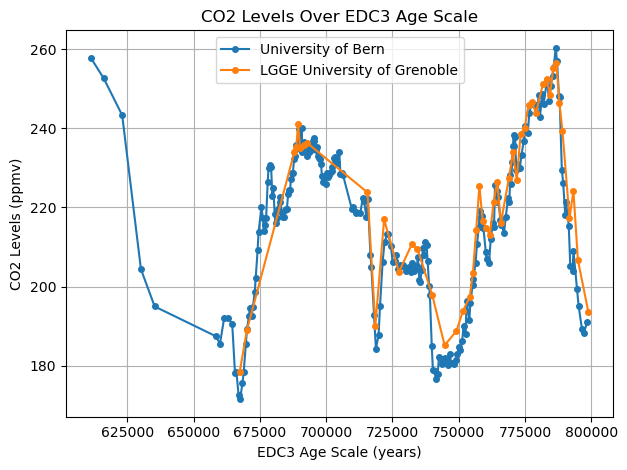

In [3]:
# Extract the relevant columns for University of Bern data.
co2_bern = df['CO2 (ppmv) (University of Bern)']
age_bern = df['EDC3_gas_a (yr) (University of Bern)']

# Extract the relevant columns for LGGE University of Grenoble data.
co2_grenoble = df['CO2 (ppmv) (LGGE University of Grenoble)']
age_grenoble = df['EDC3_gas_a (yr) (LGGE University of Grenoble)']

# Create a line plot for University of Bern data.
plt.plot(age_bern, co2_bern, label='University of Bern', linestyle='-', marker='o', markersize=4)

# Create a line plot for LGGE University of Grenoble data.
plt.plot(age_grenoble, co2_grenoble, label='LGGE University of Grenoble', linestyle='-', marker='o', markersize=4)

# Set labels and title.
plt.xlabel('EDC3 Age Scale (years)')
plt.ylabel('CO2 Levels (ppmv)')
plt.title('CO2 Levels Over EDC3 Age Scale')

# Add legend.
plt.legend()

# Display the plot.
plt.grid(True)
plt.tight_layout()
plt.show()

<div align="justify">

### Second section: Vostok-TD-Dome C

In this second section of the dataset, the information is subdivided into distinct sites and corresponding time periods, providing valuable insights into past climate conditions. My source of information to open and manipulate data from a multiple worksheet with Pandas is [www.SparkByExamples.com](https://sparkbyexamples.com/pandas/pandas-read-excel-multiple-sheets-in-pandas/).</div>

In [29]:
# Uploading again the Lüthi et al. 2008 Nature paper to explore the second part of the dtaset.
excel_file_path = '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/41586_2008_BFnature06949_MOESM31_ESM-3.xls'
sheet_name = '2.  Vostok-TD-Dome C'

# Read the second worksheet and skip appropriate rows.
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)


# Read the second worksheet and skip appropriate rows.
df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header=6)  # Skipping the first 6 rows (headers).

# Extract the specified columns for each group and create separate DataFrames.
dome_c_0_22 = df.iloc[:, :4]  # Columns A to D.
vostok = df.iloc[:, 4:7]  # Columns E to G.
taylor_dome = df.iloc[:, 7:11]  # Columns H to K.
dome_c_393_664 = df.iloc[:, 11:15]  # Columns L to O.
dome_c_393_664_lgge = df.iloc[:, 15:18]  # Columns P to R.
dome_c_611_800 = df.iloc[:, 18:22]  # Columns S to V.
dome_c_611_800_lgge = df.iloc[:, 22:25]  # Columns W to Y.

# Rename the columns of each DataFrame.
dome_c_0_22.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)', 'sigma (ppmv)']
vostok.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)']
taylor_dome.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)', 'sigma (ppmv)']
dome_c_393_664.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)', 'sigma (ppmv)']
dome_c_393_664_lgge.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)']
dome_c_611_800.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)', 'sigma (ppmv)']
dome_c_611_800_lgge.columns = ['Depth (m)', 'EDC3_gas_a (yr)', 'CO2 (ppmv)']


# Printing a general overview of the worksheet.
print (df)

     Depth (m)  EDC3_gas_a (yr)  CO2 (ppmv)  sigma (ppmv)  Depth (m).1  \
0       102.83            137.0       280.4           1.8       149.10   
1       106.89            268.0       274.9           0.7       173.10   
2       107.20            279.0       277.9           0.7       177.40   
3       110.25            395.0       279.1           1.3       228.60   
4       110.50            404.0       281.9           1.1       250.30   
..         ...              ...         ...           ...          ...   
367        NaN              NaN         NaN           NaN      3340.39   
368        NaN              NaN         NaN           NaN      3343.39   
369        NaN              NaN         NaN           NaN      3346.51   
370        NaN              NaN         NaN           NaN      3346.56   
371        NaN              NaN         NaN           NaN      3349.51   

     EDC3_gas_a (yr).1  CO2 (ppmv).1  Depth (m).2  \
0                 2690         284.7       380.82   
1    

<div align="justify"> 

The data collected by the two different universities, the University of Bern and LGGE University of Grenoble, differ in terms of site and EDC3 age of the samples:

+ University of Bern

**Dome C**
*EDC3 Age Scale**: 137 - 3190.08 years before present (kyr BP)

**Taylor Dome**
*EDC3 Age Scale*: 18906 - 63205 years before present (kyr BP)

* LGGE University of Grenoble

**Vostok**
*EDC3 Age Scale*: 2690 - 438986 years before present (kyr BP)

**Dome C**
*EDC3 Age Scale* (2nd Period): 392544 - 798893 years before present (kyr BP)</div>


In [39]:
# Eliminating null values from columns for representation
dome_c_0_22 = dome_c_0_22.dropna()
vostok = vostok.dropna()
taylor_dome = taylor_dome.dropna()
dome_c_393_664 = dome_c_393_664.dropna()
dome_c_393_664_lgge = dome_c_393_664_lgge.dropna()
dome_c_611_800 = dome_c_611_800.dropna()
dome_c_611_800_lgge = dome_c_611_800_lgge.dropna()

In [40]:
# For dome_c_0_22
print("Dome C (0-22 kyr BP0 University of Bern)")
print("First year:", dome_c_0_22["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", dome_c_0_22["EDC3_gas_a (yr)"].iloc[-1])

# For vostok
print("\nVostok (0-440 kyr BP) LGGE in Grenoble")
print("First year:", vostok["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", vostok["EDC3_gas_a (yr)"].iloc[-1])

# For taylor_dome
print("\nTaylor Dome (19-63 kyr BP) University of Bern")
print("First year:", taylor_dome["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", taylor_dome["EDC3_gas_a (yr)"].iloc[-1])

# For dome_c_393_664
print("\nDome C (393-664 kyr BP) University of Bern")
print("First year:", dome_c_393_664["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", dome_c_393_664["EDC3_gas_a (yr)"].iloc[-1])

# For dome_c_393_664_lgge
print("\nDome C (393-664 kyr BP) LGGE in Grenoble")
print("First year:", dome_c_393_664_lgge["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", dome_c_393_664_lgge["EDC3_gas_a (yr)"].iloc[-1])

# For dome_c_611_800
print("\nDome C (611-800 kyr BP) University of Bern")
print("First year:", dome_c_611_800["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", dome_c_611_800["EDC3_gas_a (yr)"].iloc[-1])

# For dome_c_611_800_lgge
print("\nDome C (611-800 kyr BP) LGGE of Grenoble")
print("First year:", dome_c_611_800_lgge["EDC3_gas_a (yr)"].iloc[0])
print("Last year:", dome_c_611_800_lgge["EDC3_gas_a (yr)"].iloc[-1])


Dome C (0-22 kyr BP0 University of Bern)
First year: 137.0
Last year: 22015.0

Vostok (0-440 kyr BP) LGGE in Grenoble
First year: 2690
Last year: 438986

Taylor Dome (19-63 kyr BP) University of Bern
First year: 18906.0
Last year: 63205.0

Dome C (393-664 kyr BP) University of Bern
First year: 415717.0
Last year: 664690.0

Dome C (393-664 kyr BP) LGGE in Grenoble
First year: 392544.0
Last year: 426953.0

Dome C (611-800 kyr BP) University of Bern
First year: 611269.0
Last year: 798512.0

Dome C (611-800 kyr BP) LGGE of Grenoble
First year: 667435.0
Last year: 798893.0


<div align="justify">

### Representation of the CO2 trend over th ECDC3 period considered in different sites

The following graphs present an intriguing comparison of CO2 trends over different time periods, revealing significant insights into the Earth's climate history. It is evident that the trends of CO2 concentration seem to follow a recurring pattern, with peaks occurring approximately every 100,000 years. This suggests that natural climate cycles may have played a significant role in shaping CO2 levels over geological time scales.  It's also important to note that the current age is situated in the middle of a CO2 concentration trend that began approximately 20,000 years ago. This means that we are currently experiencing a phase within a larger climate cycle that has been ongoing for millennia.</div>

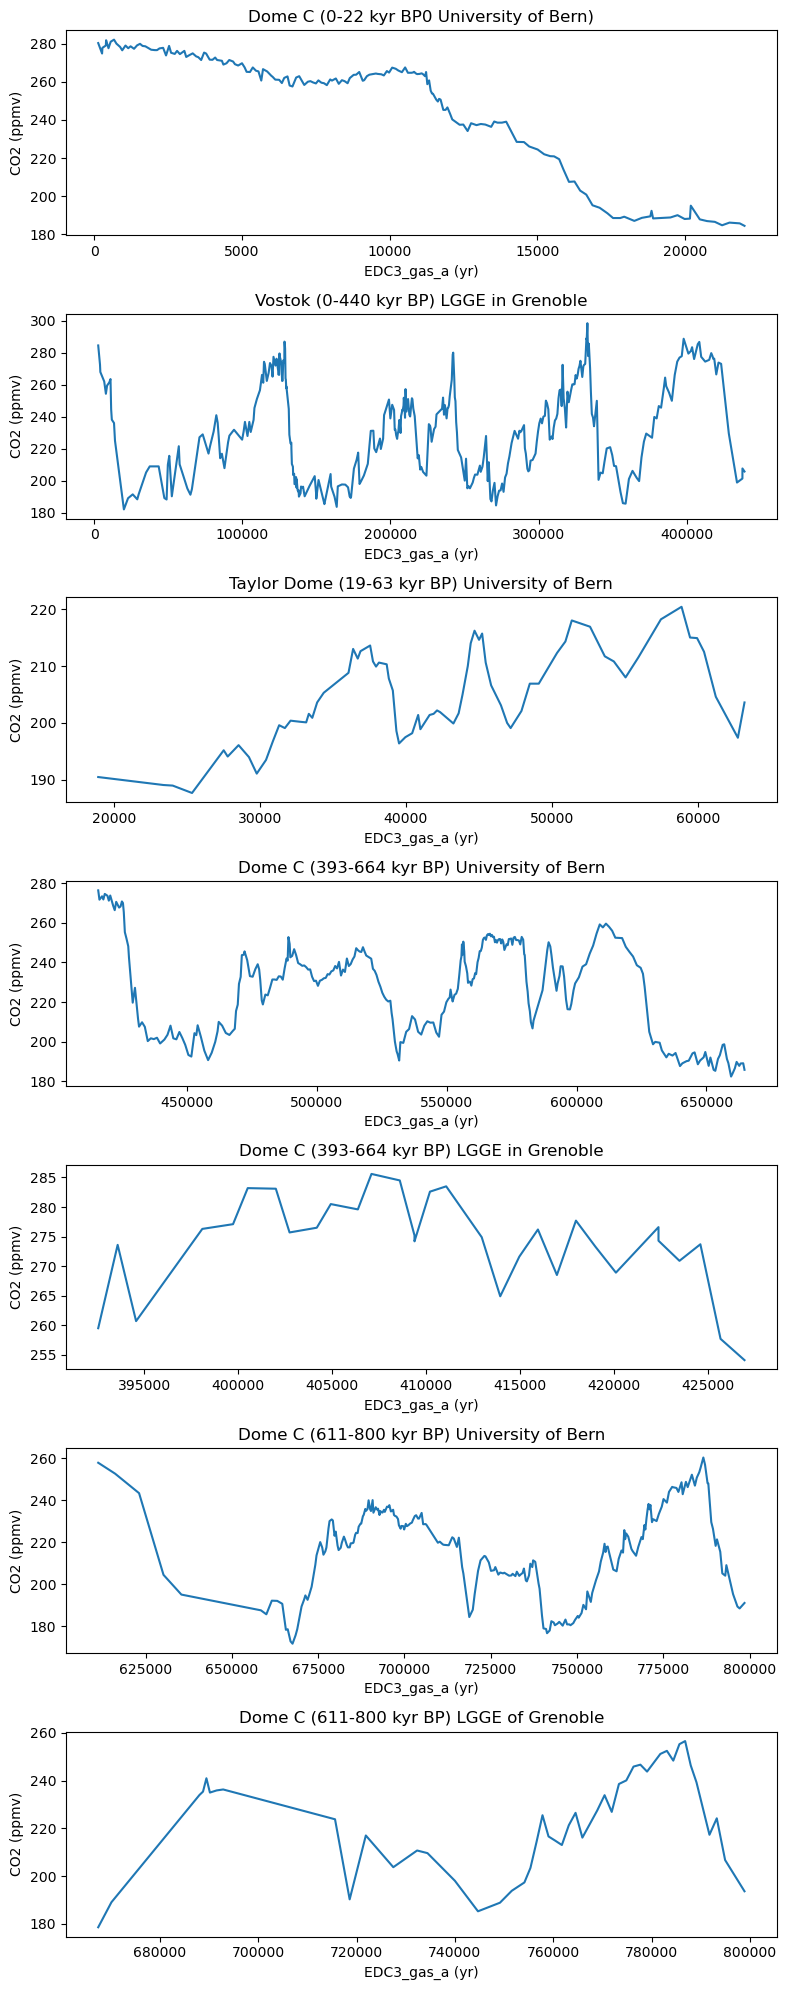

In [38]:
# Set up the subplots for the seven variables
fig, axes = plt.subplots(7, 1, figsize=(8, 20))

# Plot for Dome C (0-22 kyr BP0 University of Bern)
axes[0].plot(dome_c_0_22["EDC3_gas_a (yr)"], dome_c_0_22["CO2 (ppmv)"])
axes[0].set_title("Dome C (0-22 kyr BP0 University of Bern)")
axes[0].set_xlabel("EDC3_gas_a (yr)")
axes[0].set_ylabel("CO2 (ppmv)")

# Plot for Vostok (0-440 kyr BP) LGGE in Grenoble
axes[1].plot(vostok["EDC3_gas_a (yr)"], vostok["CO2 (ppmv)"])
axes[1].set_title("Vostok (0-440 kyr BP) LGGE in Grenoble")
axes[1].set_xlabel("EDC3_gas_a (yr)")
axes[1].set_ylabel("CO2 (ppmv)")

# Plot for Taylor Dome (19-63 kyr BP) University of Bern
axes[2].plot(taylor_dome["EDC3_gas_a (yr)"], taylor_dome["CO2 (ppmv)"])
axes[2].set_title("Taylor Dome (19-63 kyr BP) University of Bern")
axes[2].set_xlabel("EDC3_gas_a (yr)")
axes[2].set_ylabel("CO2 (ppmv)")

# Plot for Dome C (393-664 kyr BP) University of Bern
axes[3].plot(dome_c_393_664["EDC3_gas_a (yr)"], dome_c_393_664["CO2 (ppmv)"])
axes[3].set_title("Dome C (393-664 kyr BP) University of Bern")
axes[3].set_xlabel("EDC3_gas_a (yr)")
axes[3].set_ylabel("CO2 (ppmv)")

# Plot for Dome C (393-664 kyr BP) LGGE in Grenoble
axes[4].plot(dome_c_393_664_lgge["EDC3_gas_a (yr)"], dome_c_393_664_lgge["CO2 (ppmv)"])
axes[4].set_title("Dome C (393-664 kyr BP) LGGE in Grenoble")
axes[4].set_xlabel("EDC3_gas_a (yr)")
axes[4].set_ylabel("CO2 (ppmv)")

# Plot for Dome C (611-800 kyr BP) University of Bern
axes[5].plot(dome_c_611_800["EDC3_gas_a (yr)"], dome_c_611_800["CO2 (ppmv)"])
axes[5].set_title("Dome C (611-800 kyr BP) University of Bern")
axes[5].set_xlabel("EDC3_gas_a (yr)")
axes[5].set_ylabel("CO2 (ppmv)")

# Plot for Dome C (611-800 kyr BP) LGGE of Grenoble
axes[6].plot(dome_c_611_800_lgge["EDC3_gas_a (yr)"], dome_c_611_800_lgge["CO2 (ppmv)"])
axes[6].set_title("Dome C (611-800 kyr BP) LGGE of Grenoble")
axes[6].set_xlabel("EDC3_gas_a (yr)")
axes[6].set_ylabel("CO2 (ppmv)")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

<div align="justify">

### Third section: Composite CO2

The **Composite CO2** worksheet presents a comprehensive overview of carbon dioxide (CO2) concentration records spanning a vast time range from 0 to 800 thousand years before present (kyr BP) unifying all the studies previously presented in details. This summary allow to gain a valuable and global overview of the historical trends and fluctuations in atmospheric CO2 levels, contributing to our understanding of the Earth's climate evolution over millennia.</div>

In [42]:
# Creating a DataFrame for the summary table.
excel_file_path = '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/41586_2008_BFnature06949_MOESM31_ESM-3.xls'
sheet_name = '3.  Composite CO2'

# Read the third worksheet and skip the first 6 rows (headers).
df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header=7)

# Rename the columns.
df.columns = ['EDC3_gas_a (yr)', 'CO2 (ppmv)']

# Rename the DataFrame to match the table name.
df.name = 'Composite CO2 record (0-800 kyr BP)'

df

,EDC3_gas_a (yr),CO2 (ppmv)
0,268,274.9
1,279,277.9
2,395,279.1
3,404,281.9
4,485,277.7
...,...,...
1090,794608,199.4
1091,795202,195.2
1092,796467,189.3
1093,797099,188.4


<div align="justify">

### Plotting final graph from the summary table of the Composite CO2 data set of Lüthi et al., 2008.

</div>

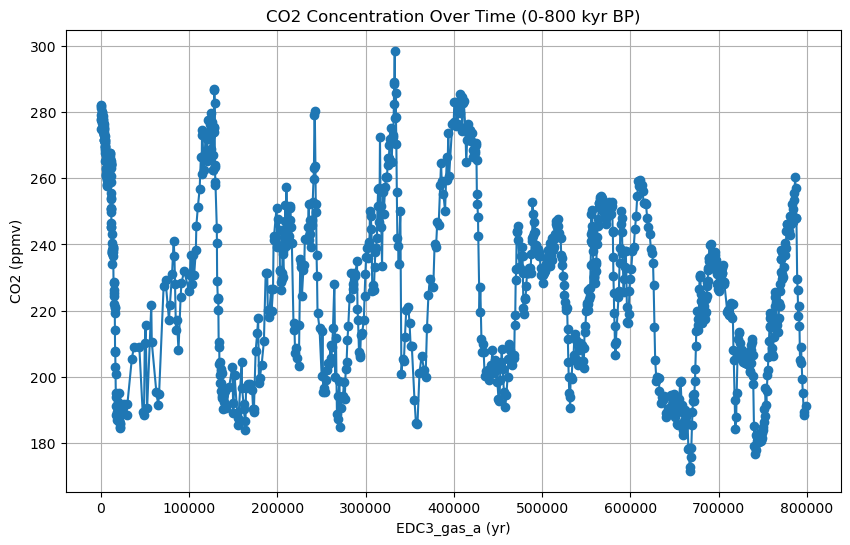

In [43]:
# Plotting the linear graph.
plt.figure(figsize=(10, 6))
plt.plot(df['EDC3_gas_a (yr)'], df['CO2 (ppmv)'], marker='o', linestyle='-')

# Adding labels and title.
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('CO2 (ppmv)')
plt.title('CO2 Concentration Over Time (0-800 kyr BP)')

# Show the plot.
plt.grid(True)
plt.show()

<div align="justify">

The graph shows the variation in CO2 concentration (in parts per million by volume, ppmv) over time (in years before present, BP) for the period 0-800 kyr BP. It appears to exhibit a generally increasing trend in CO2 concentration over time, with fluctuations. There are periods of relatively stable CO2 concentration, as well as periods of more significant variation. The graph provides an overview of how CO2 levels have changed over a span of 800,000 years, which is valuable for understanding long-term climate trends.</div>

<div align="justify">

### The European Project for Ice Coring in Antarctica Dome ice core from Dome C (EDC): Bereiter et al. (2014)


The data we have analyzed up to that point, as represented in Lüthi et al., 2008, formed the foundation of our understanding of the historical trends in atmospheric CO2. However, this dataset has now been superseded by the updated Composite CO2 record presented in Bereiter et al., 2014. The new air extraction methods and sections of the European Project for Ice Coring in Antarctica Dome ice core from Dome C (EDC) allowed a more accurate reconstruction of atmospheric CO2 concentrations spanning the past 800,000 years.  

The updated composite record is composed as follows:

51-1800 years before present (yr BP): Law Dome (Rubino et al., 2013)
1.8-2 thousand years before present (kyr BP): Law Dome (MacFarling Meure et al., 2006)
2-11 kyr BP: Dome C (Monnin et al., 2001 + 2004)
11-22 kyr BP: WAIS (Marcott et al., 2014) adjusted by minus 4 parts per million by volume (ppmv) (see text)
22-40 kyr BP: Siple Dome (Ahn et al., 2014)
40-60 kyr BP: TALDICE (Bereiter et al., 2012)
60-115 kyr BP: EDML (Bereiter et al., 2012)
105-155 kyr BP: Dome C Sublimation (Schneider et al., 2013)
155-393 kyr BP: Vostok (Petit et al., 1999)
393-611 kyr BP: Dome C (Siegenthaler et al., 2005)
612-800 kyr BP: Dome C (Bereiter et al., 2014)

The information just reported are gathered from [AGU Journals](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014GL061957)
</div>

In [5]:
# Creating a DataFrame for the summary table.
excel_file_path = '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/grl52461-sup-0003-supplementary.xls'
sheet_name = 'CO2 Composite'

# Read the third worksheet and skip the first 14 rows (headers).
df = pd.read_excel(excel_file_path, sheet_name=sheet_name, header=14)

# Rename the columns.
df.columns = ['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)']

# Rename the DataFrame to match the table name.
df.name = 'Composite CO2 record (0-800 kyr BP)'

print(df)

      Gasage (yr BP)  CO2 (ppmv)  sigma mean CO2 (ppmv)
0         -51.030000  368.022488               0.060442
1         -48.000000  361.780737               0.370000
2         -46.279272  359.647793               0.098000
3         -44.405642  357.106740               0.159923
4         -43.080000  353.946685               0.043007
...              ...         ...                    ...
1896   803925.284376  202.921723               2.064488
1897   804009.870607  207.498645               0.915083
1898   804522.674630  204.861938               1.642851
1899   805132.442334  202.226839               0.689587
1900   805668.868405  207.285440               2.202808

[1901 rows x 3 columns]


<div align="justify">

### Plotting final graph from the summary table of the Composite CO2 data set of Bereiter et al. (2014).

</div>

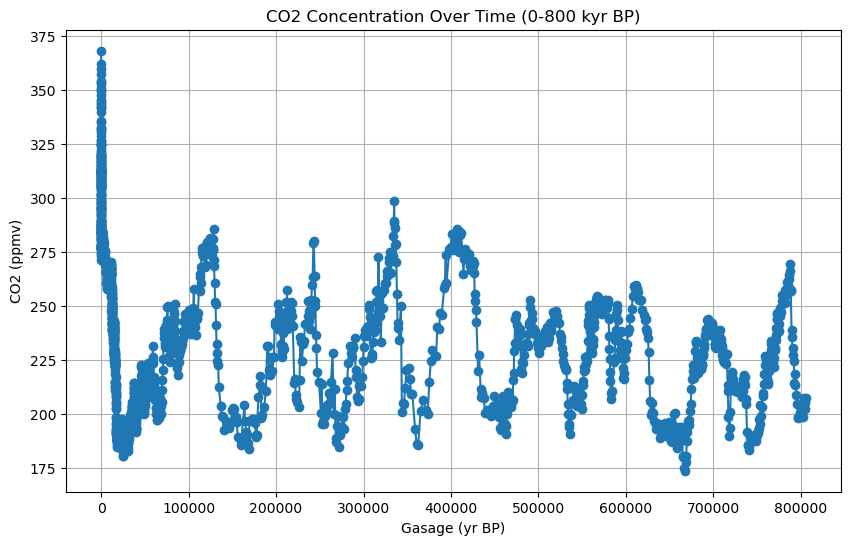

In [6]:
# Plotting a linear graph.
plt.figure(figsize=(10, 6))
plt.plot(df['Gasage (yr BP)'], df['CO2 (ppmv)'], marker='o', linestyle='-')

# Adding labels and title.
plt.xlabel('Gasage (yr BP)')
plt.ylabel('CO2 (ppmv)')
plt.title('CO2 Concentration Over Time (0-800 kyr BP)')

# Show the plot.
plt.grid(True)
plt.show()

<div align="justify">

## 2. TEMPERATURE

### An overview of EPICA Dome C search: the Jouzel, J., et al. in 2007 data set.

To understand the temperature trends over the past 800,000 years and their relationship with CO2 concentration cycles, I rely on data obtained from the **MIS 19 EPICA Dome C** research, completed in 2007. This valuable dataset, authored by **Jouzel, J., et al. in 2007**, can be accessed through the[*NOAA (National Oceanic and Atmospheric Administration)* website here](https://www.ncei.noaa.gov/access/paleo-search/study/6080).

The cornerstone of this dataset is the *EPICA Dome C ice core*, which offers an impressive record spanning over 800,000 years of climate variations. It stands as the most extended climatic record derived from ice cores. Through the analysis of this data, significant anomalies among the nine previous and current interglacial periods can be uncovered in terms of their duration, trends, and intensity.

The dataset includes high-resolution measurements of deuterium excess (d) from two EPICA ice cores, which were extracted from Dronning Maud Land (EDML) and Dome C (EDC). These parameters allow us to track climate changes across various latitudes, with a particular focus on past temperatures in central Antarctica.

Each sample was stored in a plastic sheath, tailored to fit into appropriately sized plastic *bags* at -20 degrees Celsius for a few months before being melted and then transferred into plastic bottles for the studies that resulted in the present work.  

The variables of the dataset relevant for the present analysis are:

* **EDC3béta**: *EDC3 age scale* (800,000 years agot to 1950);
+ **temp**: Temperature estimate (temperature difference from the average of the last 1000 years).

My studies on the *Jouzel et al., 2007 dataset* are based on [Science Direct](https://www.sciencedirect.com/science/article/abs/pii/S0277379109003369).</div>

In [35]:
# Read Jouzel et al. in 2007 dataframe.
df = pd.read_excel('/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/epicaDC.deuttemp.EDC3-AICC.xls')

# Rename the columns.
df.columns = ['bag','ztop','EDC3béta','AICC2012','deutfinal','temp','acc-EDC3beta']

# Show the first and last 5 rows of the DataFrame.
print(df)

       bag     ztop      EDC3béta       AICC2012  deutfinal   temp  \
0        1     0.00     -50.00000     -55.000000        NaN  218.3   
1        2     0.55     -43.55977     -50.513333        NaN  218.3   
2        3     1.10     -37.44019     -46.026667        NaN  218.3   
3        4     1.65     -31.64156     -41.540000        NaN  218.3   
4        5     2.20     -24.55278     -34.516667        NaN  218.3   
...    ...      ...           ...            ...        ...    ...   
5814  5815  3197.70  816871.60000  817562.000000     -432.2  211.0   
5815  5816  3198.25  817693.60000  818631.000000     -431.4  211.2   
5816  5817  3198.80  818505.50000  819700.000000     -430.3  211.3   
5817  5818  3199.35  819303.10000  820769.000000     -429.8  211.4   
5818  5819  3199.90  820093.90000  821838.000000     -430.0  211.4   

      acc-EDC3beta  
0         3.105321  
1         3.104805  
2         3.104404  
3         3.104025  
4         3.103453  
...            ...  
5814      1.

<div align="justify">

### Plotting Temperature Cycles against EDC3 age scale according to the data collected in the Jouzel et al. in 2007 dataframe.

</div>

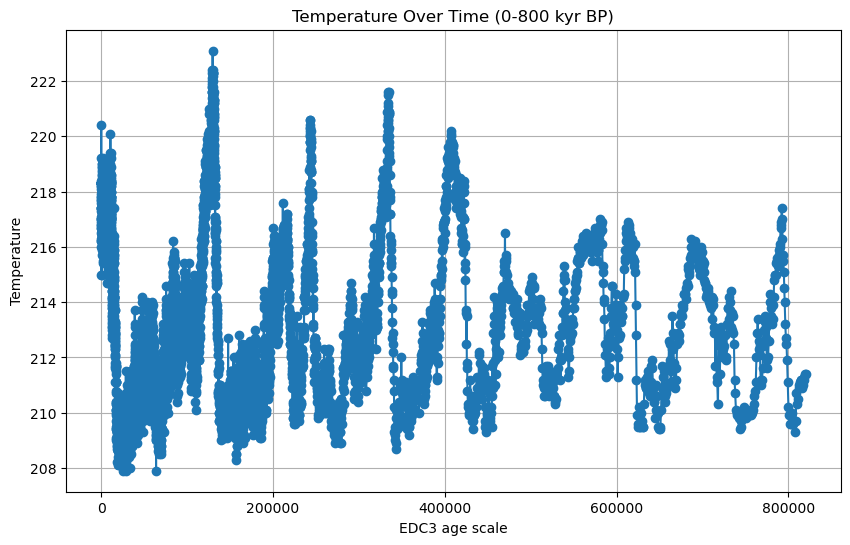

In [38]:
# Sort the DataFrame by 'EDC3béta' for a smoother line plot.
df_sorted = df.sort_values(by='EDC3béta')
plt.figure(figsize=(10, 6))

# Create a line plot of temperature against EDC3béta.
plt.plot(df_sorted['EDC3béta'], df_sorted['temp'], marker='o', linestyle='-')
plt.title('Temperature Over Time (0-800 kyr BP)')
plt.xlabel('EDC3 age scale')
plt.ylabel('Temperature')
plt.grid(True)

# Show the plot.
plt.show()

<div align="justify">

## 3. CO2 Concentration Vs Temperature Anomalies.

</div>

<div align="justify">

### Extracting CO2 Concentration, Temperature Anomalies and Time variables from two different DataFrame.

To plot the *CO2 concentration* and *Temperature anomalies* over time, it's essential to merge the two datasets containing these variables. However, this can be challenging since the time frames and the two dependent variable that structure these datasets are different. 

1. To begin, the two datasets have two different time variables against which the *CO2 concentration* and *Temperature anomalies* are respectively are measured. To solve this issue, the first step is to create a unified time axis that can accommodate both datasets and this involves aligning the two time variables so that they share a common set of time points.

2. Once we have a common time axis, the next challenge is to redistribute the CO2 concentration and Temperature anomalies data coherently along this new aligned time frame. This ensures that the data from both datasets are synchronized and ready for comparison.

3. Lastly, the different units of measure that the *CO2 concentration* and the *Temperature Anomalies* are measured with need to be accounted for in order to effectively build the y axis of my plot. 

These representation necessities leads to the development of a new DataFrame that satisfy the requirements needed to visually compare the *CO2 concentration* cycles and the *Temperature Anomalies*  over the past 800,000 years.

</div>

<div align="justify">

- **Creating a new Time pattern for the past 800,000 years.**

To align two time variables representing the same time span from different datasets, **interpolation** techniques are used to estimate values between known points. The *EPICA DC dataset* contains significantly more time steps than the *Dome C (EDC): Bereiter et al. (2014) dataset*. To effectively align these two variables, it's necessary to harmonize the number of time steps. To achieve this, the *NumPy* **np.interp()** function employs linear interpolation, simplifying the merging process of datasets with distinct time measures. This approach allows for the creation of a unified independent variable that facilitates the comparison of cycles in both *CO2 Concentration* and *Temperature Anomalies*.  

For this method's usage I have referred to [Spark By {Examples}](https://sparkbyexamples.com/python/numpy-interpolate-function/).</div>

In [12]:
# Read the CO2 Concentration dataset.
co2_excel_file_path = '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/grl52461-sup-0003-supplementary.xls'
co2_sheet_name = 'CO2 Composite'
co2_df = pd.read_excel(co2_excel_file_path, sheet_name=co2_sheet_name, header=14)

# Rename the columns for CO2 Concentration.
co2_df.columns = ['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)']

# Read the Temperature dataset.
temp_excel_file_path = '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/epicaDC.deuttemp.EDC3-AICC.xls'
temp_df = pd.read_excel(temp_excel_file_path)

# Rename the columns for Temperature.
temp_df.columns = ['bag', 'ztop', 'EDC3béta', 'AICC2012', 'deutfinal', 'temp', 'acc-EDC3beta']

# Interpolate the 'Gasage (yr BP)' values to match the length of 'EDC3béta'.
interpolated_gasage_co2 = np.interp(temp_df.index, co2_df.index, co2_df['Gasage (yr BP)'])

# Create a new DataFrame for the interpolated 'Gasage (yr BP)' values.
interpolated_gasage_co2_df = pd.DataFrame({'Gasage (yr BP)': interpolated_gasage_co2})

# Merge the two datasets on the 'EDC3béta' column and the new DataFrame for interpolated 'Gasage (yr BP)'.
merged_df = pd.concat([interpolated_gasage_co2_df, temp_df], axis=1)

# Create a new time variable based on the interpolated 'Gasage (yr BP)'.
new_time_variable = merged_df['Gasage (yr BP)']

# Display the new time variable.
print(new_time_variable)


0          -51.030000
1          -48.000000
2          -46.279272
3          -44.405642
4          -43.080000
            ...      
5814    805668.868405
5815    805668.868405
5816    805668.868405
5817    805668.868405
5818    805668.868405
Name: Gasage (yr BP), Length: 5819, dtype: float64


<div align="justify">

+ **Adjusting the CO2 Concentration Variable to the New Time Frame.**

To ensure consistency between the two independent variables intended for graphical comparison, the same *interpolation* procedure is applied to the *CO2 Concentration* data, which has a significantly lower number of samples compared to the *Temperature* variable.

</div>

In [14]:
# Interpolate the 'Gasage (yr BP)' values to match the length of 'EDC3béta'
interpolated_gasage_co2 = np.interp(temp_df.index, co2_df.index, co2_df['Gasage (yr BP)'])

# Interpolate the 'CO2 (ppmv)' values to match the length of 'temp'.
interpolated_co2_ppmv = np.interp(temp_df.index, co2_df.index, co2_df['CO2 (ppmv)'])

# Create a new DataFrame for the interpolated 'Gasage (yr BP)' values.
interpolated_gasage_co2_df = pd.DataFrame({'Gasage (yr BP)': interpolated_gasage_co2})

# Create a new DataFrame for the interpolated 'CO2 (ppmv)' values.
interpolated_co2_ppmv_df = pd.DataFrame({'CO2 (ppmv)': interpolated_co2_ppmv})

# Merge the two datasets on the 'EDC3béta' column and the new DataFrames for interpolated 'Gasage (yr BP)' and 'CO2 (ppmv)'.
merged_df = pd.concat([interpolated_gasage_co2_df, interpolated_co2_ppmv_df, temp_df], axis=1)

# Create a new time variable based on the interpolated 'Gasage (yr BP)'.
new_time_variable = merged_df['Gasage (yr BP)']

# Display the new time variable and the merged DataFrame.
print(new_time_variable)
print(merged_df)

0          -51.030000
1          -48.000000
2          -46.279272
3          -44.405642
4          -43.080000
            ...      
5814    805668.868405
5815    805668.868405
5816    805668.868405
5817    805668.868405
5818    805668.868405
Name: Gasage (yr BP), Length: 5819, dtype: float64
      Gasage (yr BP)  CO2 (ppmv)   bag     ztop      EDC3béta       AICC2012  \
0         -51.030000  368.022488     1     0.00     -50.00000     -55.000000   
1         -48.000000  361.780737     2     0.55     -43.55977     -50.513333   
2         -46.279272  359.647793     3     1.10     -37.44019     -46.026667   
3         -44.405642  357.106740     4     1.65     -31.64156     -41.540000   
4         -43.080000  353.946685     5     2.20     -24.55278     -34.516667   
...              ...         ...   ...      ...           ...            ...   
5814   805668.868405  207.285440  5815  3197.70  816871.60000  817562.000000   
5815   805668.868405  207.285440  5816  3198.25  817693.60000  8186

<div align="justify">

* **Creating a Plot with Two Different Y-Axes.**

To address the challenge posed by the different units of measurement for *CO2 concentration* and *Temperature Anomalies*, I am now creating a **dual y-axes plot**. This approach enables a graphical representation of each variable on separate y-axes, clearly indicating the distinct measurement scales for effective visualization and comparison. This technique has been deployed following the indication gathered on [Towards Data Science](https://towardsdatascience.com/dual-axis-plots-in-python-95e5ef24a4e0).

</div>

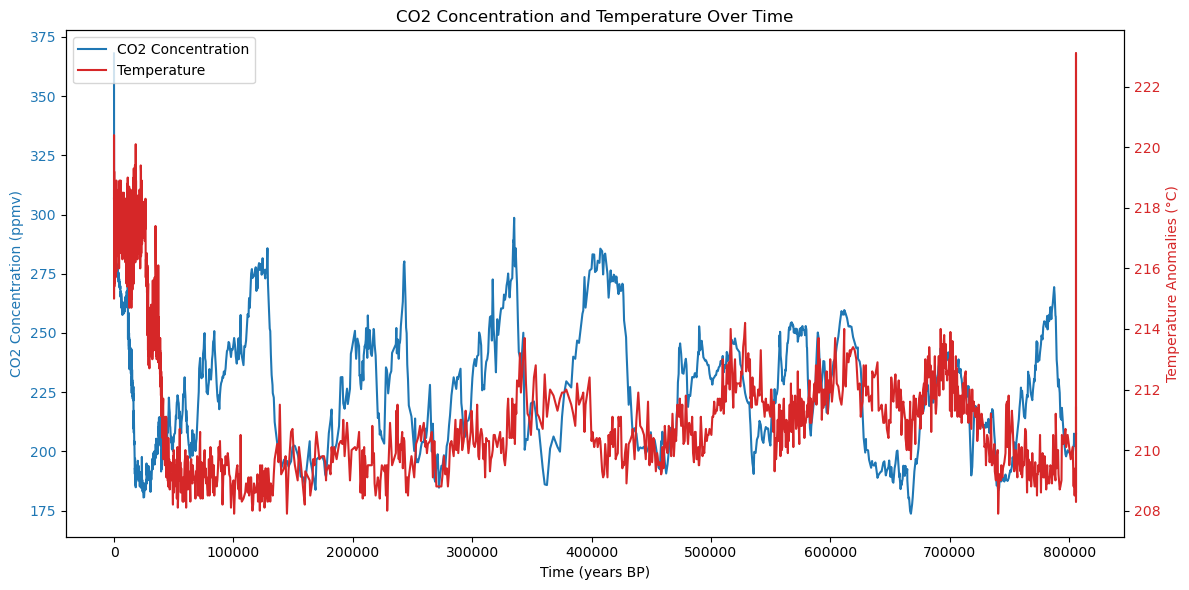

In [19]:
# Creating an empty plot.
ffig, ax1 = plt.subplots(figsize=(12, 6))

# Define the x-axis (time variable).
x = merged_df['Gasage (yr BP)']

# Define the first y-axis (CO2 Concentration).
y1 = merged_df['CO2 (ppmv)']
ax1.set_xlabel('Time (years BP)')
ax1.set_ylabel('CO2 Concentration (ppmv)', color='tab:blue')
ax1.plot(x, y1, color='tab:blue', label='CO2 Concentration')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (Temperature).
ax2 = ax1.twinx()
y2 = merged_df['temp']
ax2.set_ylabel('Temperature Anomalies (°C)', color='tab:red')
ax2.plot(x, y2, color='tab:red', label='Temperature')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends.
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Set the title.
plt.title('CO2 Concentration and Temperature Over Time')

# Show the plot.
plt.tight_layout()
plt.show()

<div align="justify">

### Conclusion

In conclusion, observing the graph, the two trends reveal that the *CO2 concentration* and *Temperature* exhibit relatively independent trends over time until recent history, spanning approximately 200 years. Notably, during this recent period, **a striking and unprecedented surge in CO2 concentration coincides with a corresponding and unprecedented rise in Temperature**.

</div>

<div align="justify">

***

## SECOND PART:  Polar Ice-coverage

***

</div>

<div align="justify">

### The NSIDC Sea Ice Index (Fetterer et al.'s 2017)  

The **NSIDC Sea Ice Index**, as presented in **Fetterer et al.'s 2017** publication and accessible at [Fetterer, F., K. Knowles, W. N. Meier, M. Savoie, and A. K. Windnagel. Sea Ice Index, Version 3. 2017, Distributed by National Snow and Ice Data Center. https://doi.org/10.7265/N5K072F8. Date Accessed 12-27-2023.](https://nsidc.org/data/g02135/versions/3), comprises a user-friendly suite of sea ice assessments designed to monitor alterations in Arctic and Antarctic sea ice and it's managed by the NOAA (e National Oceanic and Atmospheric Administration) at NSIDC (National Snow and Ice Data Center).  

The collection draws from two sources made available through the NASA NSIDC Distributed Active Archive Center (DAAC): (1) Sea Ice Concentrations from Nimbus-7 SMMR and DMSP SSM/I-SSMIS Passive Microwave Data, Version 1 by [Cavalieri et al. 1996](https://nsidc.org/data/nsidc-0051) and (2) Near-Real-Time DMSP SSMIS Polar Gridded Sea Ice Concentrations, Version 1 by [Maslanik and Stroeve 1999](https://nsidc.org/data/nsidc-0081). Both products consist of gridded sea ice concentration datasets derived from passive microwave imagery utilizing the NASA Team algorithm as described by Cavalieri et al. [1984; 1999]. Both products consist of gridded sea ice concentration datasets derived from passive microwave imagery utilizing the NASA Team algorithm as described by Cavalieri et al. [1984; 1999].  

The **Sea Ice Index** consists of two main elements: **total sea ice extent** and **sea ice area values**. It provides a consistent, long-term record of **sea ice conditions dating back to 1979**.

Its simplicity makes it a valuable tool for educators who use it to teach students about changes in the Arctic. Various U.S. government agencies, including the Defense Department, rely on this data to understand how Arctic changes impact their operations and to plan for the future. Journalists have also referenced the Sea Ice Index data in numerous stories about Arctic sea ice, reflecting its relevance and importance in reporting. Additionally, the general public finds value in the straightforward data and clear visual representations to illustrate these changes.

For our current study, I am focusing on data from the southern hemisphere. The datasets are available in comma-delimited ASCII text format (.csv), providing yearly extent and area values in millions of square kilometers for a specific month throughout the entire time series.  

The set comprises 12 files, each corresponding to a specific month. These files contain six columns of information structured as follows:

1. **year**: A four-digit representation of the year;
2. **mo**: A one- or two-digit indicator for the month;
3. **data_type**: Denoting the source of the input data;
4. **region**: Indicating either N for Northern or S for Southern;
5. **extent**: *The area of ocean covered with more than 15% Sea Ice Concentration (SIC)* measured in millions of square kilometers*;
6. **area**: *The total ocean area covered by any amount of ice also measured in millions of square kilometers*.  

In this study, my primary focus is on the **EXTENT** variable, which provides a global measurement. This global measurement allows for a more comprehensive assessment of the changing trends. Unlike sea ice area, which accounts for the entire surface covered by ice, extent considers the total area with at least 15 percent sea ice cover. It's worth noting that NSIDC typically reports extent, which tends to yield higher values compared to area measurements. Consequently, my analysis is centered on reconstructing the trends in ice coverage extent from 1979 to the present day.  

Therefore, as a first step, I am currently creating a new DataFrame to track changes in sea ice coverage from 1979 to the present.</div>

In [6]:
# List of file names.
file_names = ['/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_01_extent_v3.0.csv', 
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_02_extent_v3.0.csv', 
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_03_extent_v3.0.csv', 
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_04_extent_v3.0.csv',
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_05_extent_v3.0.csv',
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_06_extent_v3.0.csv',
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_07_extent_v3.0.csv',
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_08_extent_v3.0.csv',
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_09_extent_v3.0.csv',
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_10_extent_v3.0.csv',
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_11_extent_v3.0.csv',
              '/Users/andreacignoni/Desktop/Scrivania - Mac mini di Andrea/Repos/PfDA_Project2/data/S_12_extent_v3.0.csv']

# Step 1: Read the 12 CSV files into individual DataFrames.
dfs = [pd.read_csv(file) for file in file_names]

# Step 2: Concatenate these DataFrames into one large DataFrame.
combined_df = pd.concat(dfs)

# Check the column names in the combined DataFrame.
print(combined_df.columns)

# Grouping theyear and extent column into a single DataFrame.
grouped_df = combined_df.groupby('year')[' extent'].mean().reset_index()

print(grouped_df)

Index(['year', ' mo', '    data-type', ' region', ' extent', '   area'], dtype='object')
    year      extent
0   1978   13.150000
1   1979   11.655833
2   1980   11.205833
3   1981   11.386667
4   1982   11.595000
5   1983   11.344167
6   1984   11.428333
7   1985   11.569167
8   1986   11.044167
9   1987 -822.707500
10  1988 -822.164167
11  1989   11.380833
12  1990   11.365000
13  1991   11.498333
14  1992   11.374167
15  1993   11.370000
16  1994   11.727500
17  1995   11.748333
18  1996   11.743333
19  1997   11.340833
20  1998   11.689167
21  1999   11.712500
22  2000   11.724167
23  2001   11.627500
24  2002   11.175833
25  2003   11.924167
26  2004   11.938333
27  2005   11.647500
28  2006   11.411667
29  2007   11.636667
30  2008   12.213333
31  2009   11.999167
32  2010   12.057500
33  2011   11.450000
34  2012   11.980833
35  2013   12.474167
36  2014   12.726667
37  2015   12.365833
38  2016   11.177500
39  2017   10.702500
40  2018   10.951667
41  2019   10.830000
42  2020